# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.stats import shapiro
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1. Is the distribution of body temperatures normal?

In [8]:
#Histogram

In [16]:
n_data = len(df['temperature'])
n_bins = int(np.sqrt(n_data))

[Text(0,0.5,'pdf'), Text(0.5,0,'temperature')]

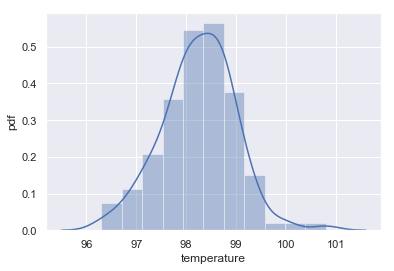

In [17]:
ax = sns.distplot(df['temperature'],bins=n_bins)
ax.set(xlabel='temperature', ylabel='pdf')

In [19]:
# Shapiro-Wilk Test

In [24]:
stat, p = shapiro(df['temperature'])
if p < 0.05:
    print(p,'Reject H0, sample is not likely drawn from Gaussian distribution')
else:
    print(p,'Accept H0, sample is likely drawn from Gaussian distribution')

0.233174666762352 Accept H0, sample is likely drawn from Gaussian distribution


### The distribution of body temperatures looks to be normal according to the histogram and frequentist testing.

## 2. Is the sample size large? Are the observations independent?

### Since the general rule of thumb is that sample sizes of at least 30 are typically large enough for repeated sampled means to be normally distributed, this sample size (130 observations) is large.  

### Since the body temperature of one human temperature is not dependent on the body temperature of another human, the observations can be considered independent.

## 3. Is the true population mean really 98.6 degrees F?

### 3.1.  Bootstrap Hypothesis Test

#### H0: The true population mean of body temperatures is 98.6 degrees F.

#### H1: The true population mean of body temperatures is not 98.6 degrees F.

In [25]:
# Function to generate bootstrap replicates from 1D array
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [26]:
# Function to generate replicates of n size, stored as an array
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [35]:
temps = df['temperature']

In [36]:
# Mean shift.  Shifting the mean to 98.6 lets us see the probability of getting a population mean not equal to 98.6.
translated_temps = temps + 98.6 - np.mean(temps)

In [99]:
bs_replicates = draw_bs_reps(temps, np.mean,10000)

In [100]:
# 95% Confidence Interval
print(np.percentile(bs_replicates,[2.5,97.5]))

[98.12076923 98.37384615]


[Text(0,0.5,'count'), Text(0.5,0,'replicated temp means')]

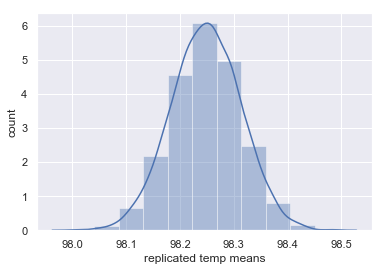

In [104]:
# Plot the replicated means to see where 98.6 fits and which side would be the extreme
ax = sns.distplot(bs_replicates,bins=n_bins)
ax.set(xlabel='replicated temp means', ylabel='count')

In [105]:
# Compute fraction of replicates that are different than the hypothesized mean temperature
p = np.sum(bs_replicates > 98.6) / 10000

In [106]:
print(p)

0.0


### 3.2. Frequentist Statistic Testing: One Sample vs. Two Sample

#### This will be a one sample test since there is just one treatment group and we are not exploring the difference of means between two groups

### 3.3. Is it appropriate to use the t or z statistic?

#### Because the sample size is over 30, it is appropriate to use the z test statistic.

### 3.4.Using the other test, how is the result different? Why?

In [69]:
# z Test 
ztest, pval = stests.ztest(temps, x2=None, value=98.6)
print(float(pval))

4.9021570141012155e-08


#### The z test result is smaller.  The results are different because this test utilizes the actual observed data whereas the bootstrap test utilizes resampled means to test the hypothesis.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [107]:
sample = np.random.choice(temps,size=10)

In [108]:
# z Test
ztest, pval = stests.ztest(sample, x2=None, value=98.6)
print(float(pval))

0.0060564295917575435


In [116]:
# t Test
ttest, pval = stats.ttest_1samp(sample, popmean=98.6)
print(float(pval))

0.02267215985222846


### 4.1. Which one is the correct one to use?

#### The t statistic is the appropriate test to use because the sample size is small (under 30).

### 4.2. What do you notice? What does this tell you about the difference in application of the t and z statistic?

#### In this comparison, the z test p-value is smaller than the t test p-value.  Because the Central Limit Theorem does not apply when sample sizes are small, the t test seems more conservative to lend the test more statistical validity.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [156]:
#Generate replicates
bs_replicates = draw_bs_reps(temps, np.mean,10000)

# Standard error of bootstrap replicates
bs_se = np.std(bs_replicates)

#Calculate critical z-value
z = stats.norm.ppf(0.975)

# Margin of Error
bs_moe = z * bs_se

# 95% Confidence Interval
bs_ci = np.mean(bs_replicates) + np.array([-1, 1]) * bs_moe
print("Temperatures outside the range of " + str(round(bs_ci[0],2)) 
      + " and " + str(round(bs_ci[1],2)) + " F are abnormal.")

Temperatures outside the range of 98.12 and 98.37 F are abnormal.


In [155]:
# Frequentist Approach

se = np.std(temps)

moe = z * se

ci = np.mean(temps) + np.array([-1,1]) * moe

print("Temperatures outside the range of " + str(round(ci[0],2)) 
      + " and " + str(round(ci[1],2)) + " are abnormal.")

Temperatures outside the range of 96.82 and 99.68 are abnormal.


## 6. Is there a significant difference between males and females in normal temperature?

### PROBLEM

#### For over 120 years, the mean human body temperature was held to be 98.6 degrees Fahrenheit.  Is this mean body temperature accurate for both males and females?

#### H0: There is no difference between the mean temperature of males and mean temperature of females.

#### H1: There is a difference between the mean temperature of males and mean temperature of females.

### DATA EXPLORATION

In [161]:
m = df[df.gender == 'M']
f = df[df.gender == 'F']

In [162]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [163]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 129
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [172]:
m_mean_temp = np.mean(m.temperature)
f_mean_temp = np.mean(f.temperature)
print(m_mean_temp, f_mean_temp)

98.1046153846154 98.39384615384613


#### The data consists of 65 observations for each male and female temperatures.  The mean human body temperatures for males are females are observed as 98.10 and 98.39 degrees F, respectively.

[Text(0,0.5,'pdf'), Text(0.5,0,'temperature')]

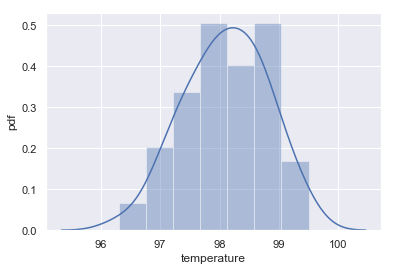

In [169]:
# Male histogram of temps
ax = sns.distplot(m['temperature'])
ax.set(xlabel='temperature', ylabel='pdf')

[Text(0,0.5,'pdf'), Text(0.5,0,'temperature')]

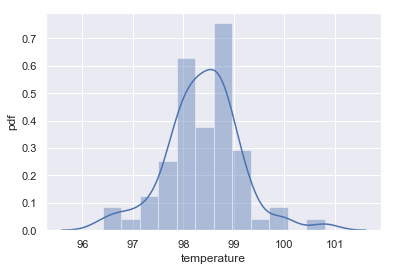

In [170]:
# Female histogram of temps
ax = sns.distplot(f['temperature'])
ax.set(xlabel='temperature', ylabel='pdf')

In [173]:
# Shapiro Wilk - Male
stat, p = shapiro(m['temperature'])
if p < 0.05:
    print(p,'Reject H0, sample is not likely drawn from Gaussian distribution')
else:
    print(p,'Accept H0, sample is likely drawn from Gaussian distribution')

0.8545167446136475 Accept H0, sample is likely drawn from Gaussian distribution


In [174]:
# Shapiro Wilk - Female
stat, p = shapiro(f['temperature'])
if p < 0.05:
    print(p,'Reject H0, sample is not likely drawn from Gaussian distribution')
else:
    print(p,'Accept H0, sample is likely drawn from Gaussian distribution')

0.09016574919223785 Accept H0, sample is likely drawn from Gaussian distribution


####  These data sets follow a normal distribution; this was tested using both the graphical histogram method and the Shapiro-Wilk test for normality.  According to the Central Limit Theorem, the larger the sample size the the closer the data is to having a normal distribution.  Because both datasets have at least 30 observations, they can be deemed sufficiently large enough to apply this theorem.

#### These observations can also be considered independent as one male or female's body temperature is not dependent on another male or female's body temperature.

### HYPOTHESIS TESTING

#### Because the sample sizes are above 30 observations in each dataset, the z test will be used.  The null and alternative hypotheses are reiterated as follows:

#### H0:  There is no difference in means between male and female body temperatures.
#### H1:  There is a difference in means between male and female body temperatures.

#### A two-sampled z test with a significance value of 0.05 will be used to test the null hypothesis

In [167]:
# z Test
ztest, pval = stests.ztest(m['temperature'],f['temperature'],alternative='two-sided')
print(float(pval))

0.02228736076065755


#### The p-value for this test is 0.022--less than our alpha of 0.05. The result is significant; we will reject the null hypothesis that there is no difference in means between male and female body temperatures.